In [27]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as nmp
import pandas as pnd
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df = pnd.read_csv("/content/drive/MyDrive/apartemen2(baru).csv")
print(df)

   Unnamed: 0    KodeApt   Wilayah St_Milik  Jum_Kamar
0           0      104.0    Bantul        Y        3.0
1           1      197.0    Sleman        N        3.0
2           2  1000000.0    Sleman        N        3.0
3           3      201.0     Yogya        N        1.0
4           4      203.0     Yogya        Y        3.0
5           5      207.0     Yogya        Y        3.0
6           6     9999.0  KL-Progo        Y        2.0
7           7      213.0    Bantul        Y        3.0
8           8      215.0    Bantul        Y        3.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   KodeApt     9 non-null      float64
 2   Wilayah     9 non-null      object 
 3   St_Milik    9 non-null      object 
 4   Jum_Kamar   9 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 488.0+ bytes


In [30]:
# List baru
label_harga = ['Murah', 'Murah', 'Mahal', 'Murah', 'Mahal', 'Mahal', 'Mahal', 'Murah', 'Murah']
# Kolom baru
df['Label'] = label_harga
print(df)

   Unnamed: 0    KodeApt   Wilayah St_Milik  Jum_Kamar  Label
0           0      104.0    Bantul        Y        3.0  Murah
1           1      197.0    Sleman        N        3.0  Murah
2           2  1000000.0    Sleman        N        3.0  Mahal
3           3      201.0     Yogya        N        1.0  Murah
4           4      203.0     Yogya        Y        3.0  Mahal
5           5      207.0     Yogya        Y        3.0  Mahal
6           6     9999.0  KL-Progo        Y        2.0  Mahal
7           7      213.0    Bantul        Y        3.0  Murah
8           8      215.0    Bantul        Y        3.0  Murah


In [31]:
# Akan menampilkan statistik deskriptif, tetapi hanya yang bertipe numerik
print(df.describe())

       Unnamed: 0         KodeApt  Jum_Kamar
count    9.000000        9.000000   9.000000
mean     4.000000   112371.000000   2.666667
std      2.738613   332876.679663   0.707107
min      0.000000      104.000000   1.000000
25%      2.000000      201.000000   3.000000
50%      4.000000      207.000000   3.000000
75%      6.000000      215.000000   3.000000
max      8.000000  1000000.000000   3.000000


In [32]:
# Count Data untuk aatribut wilayah
df.Wilayah.unique()
valueCount = df.Wilayah.value_counts()
print(valueCount)

Bantul      3
Yogya       3
Sleman      2
KL-Progo    1
Name: Wilayah, dtype: int64


In [33]:
from numpy.core.fromnumeric import mean
# Mean Data untuk atribut numerik
meanumerik = df.describe()
print(nmp.mean(meanumerik))

Unnamed: 0         4.467327
KodeApt       180747.959958
Jum_Kamar          3.171722
dtype: float64


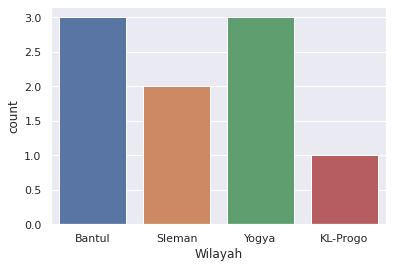

In [34]:
# Visualisasi diagram batang utk kolom wilayah
import seaborn as sbrn
sbrn.set(style="darkgrid")
ax = sbrn.countplot(x = "Wilayah", data = df)

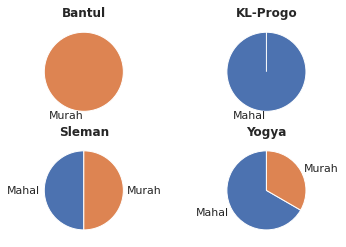

In [35]:
import seaborn as sbrn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2)
ax = ax.flatten()
tab = pnd.crosstab(df['Wilayah'],df['Label'])
for i,cat in enumerate(tab.index):
  tab.loc[cat].plot.pie(ax=ax[i],startangle=90)
  ax[i].set_ylabel('')
  ax[i].set_title(cat, fontweight='bold')

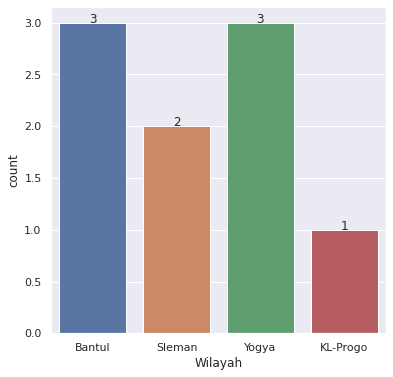

In [36]:
# Bentuk lain
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
# total = float(len(df["Label"]))
ax = sbrn.countplot(x = "Wilayah", data = df)
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width() / 2., height, '{:1.0f}'.format((height)), ha="center")
plt.show()

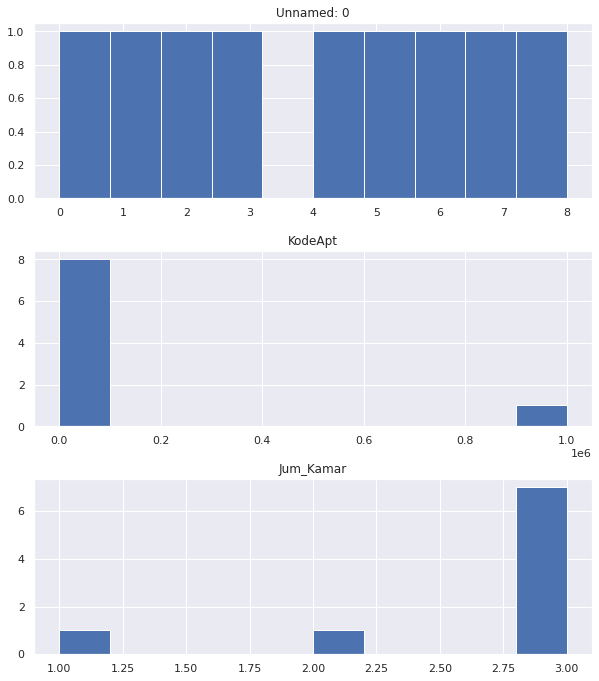

In [37]:
# histogram semua atribut numerik
numerik_df = df.select_dtypes(include=['float64', 'int64'])
numerik_index = numerik_df.columns
df.hist(column=numerik_index, figsize=(10,20), layout=(5,1))
plt.show()

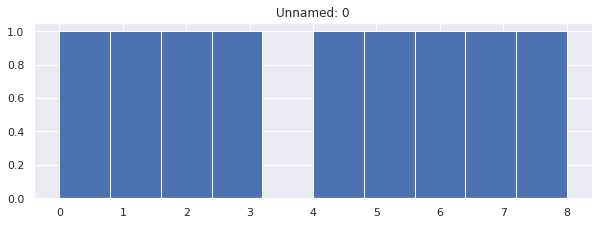

In [38]:
# histogram atribut numerik hanya yang terpilih (Unnamed)
numerik_df = ['Unnamed: 0']
numerik_index = numerik_df
df.hist(column=numerik_index, figsize=(10,20), layout=(5,1))
plt.show()

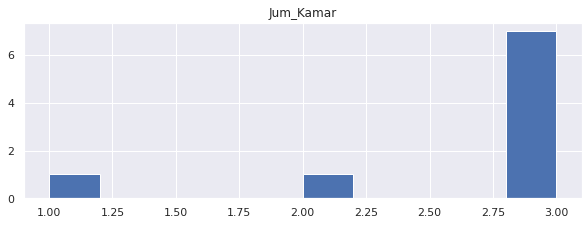

In [39]:
# histogram atribut numerik hanya yang terpilih (jumlah kamar)
numerik_df = ['Jum_Kamar']
numerik_index = numerik_df
df.hist(column=numerik_index, figsize=(10,20), layout=(5,1))
plt.show()

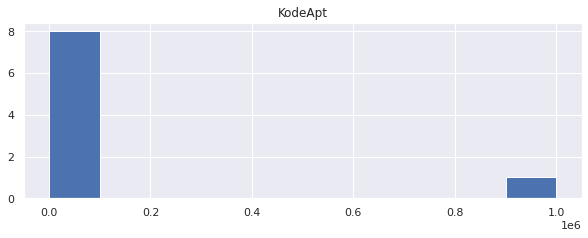

In [40]:
# histogram atribut numerik hanya yang terpilih (KodeApt)
numerik_df = ['KodeApt']
numerik_index = numerik_df
df.hist(column=numerik_index, figsize=(10,20), layout=(5,1))
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

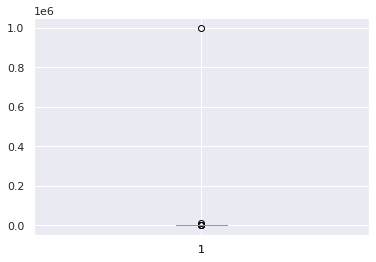

In [41]:
#boxplot with mathplotlib, melihat outlier yang dapat terjadi
plt.boxplot(df.KodeApt)
plt.boxplot(df.Jum_Kamar)
plt.plot